<a href="https://colab.research.google.com/github/cassianovello/mpv_01/blob/main/DataScience_MVP_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Data Science - MVP 01**

---


Este trabalho consiste na análise exploratória do dataset "Feline behaviour and personality survey data", encontrado completo no [repositório FigShare](https://figshare.com/articles/dataset/Feline_behavior_and_personality_survey_data/14899077/2).

O subconjunto do dataset original que será abordado neste trabalho é composto por duas partes: (i) informações cadastrais de cada animal como raça, sexo e idade e (ii) escores para sete traços de personalidade, calculados utilizando-se o método de estimativa "tenBerge" baseado numa pesquisa sobre o comportamento dos animais.

A pesquisa foi respondida por tutores de gatos. Nesta pesquisa, eles classificaram o comportamento do animal de acordo com diversas situações como: "busca contato físico com pessoas", "abre portas", "descansa em locais seguros", etc, usando a escala Likert (escala de 5 graus que varia de discordo fortemente até concordo fortemente). Neste trabalho, não abordaremos as respostas da pesquisa em si, mas sim escores calculados com base nela.

Mais informações sobre a pesquisa e o método de cálculo dos escores encontram-se no artigo [Reliability and Validity of Seven Feline Behavior and Personality Traits](https://doi.org/10.3390/ani11071991).

 



In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython.display import display

import plotly.graph_objects as go

import seaborn as sns

Leitura dos dados

In [2]:
# url a importar
url_dados = 'https://raw.githubusercontent.com/cassianovello/mpv_01/main/Feline_dataset_compact.csv'

# carga do dataset através da url
df = pd.read_csv(url_dados,sep=';')

df.head()

,CATID,BREEDGROUP,SEX,AGE_BEHAVIOUR,OTHER_CATS,problematic_behavior,fearfulness,human_aggression,activity_playfulness,cat_sociability,human_sociability,litterbox_issues,excessive_grooming
0,1,Siberian_and_Neva_Masquerade,Female,"5,079872204",unknown,unknown,"-0,592535855","-0,376838532","0,677554498","0,247060591","1,318159592","-0,370579892","-0,329714164"
1,2,Sphynx_and_Devon_Rex,Female,"4,225506294",unknown,unknown,"0,961022037","1,890785811","-0,585892552","-1,31907745","-1,185782329","-0,758987462","0,986190805"
2,3,Oriental,Female,"7,419575633",NO,A_little,"-0,48003798","-0,288478537","0,583599898","0,1834663","1,313597761","-0,127346636","-0,009533091"
3,4,Sphynx_and_Devon_Rex,Female,2,YES,No,"-0,876062946","-0,696218261","1,255441754","0,899893583","0,475639017","-0,514913155","-0,259346702"
4,5,House_cat,Female,"3,535049288",YES,A_little,"-0,746316221","-0,619939655","-0,578863964","-0,337497461","-0,333069701","3,084435142","-0,113738586"


In [3]:
df.isna().sum()

CATID                   0
BREEDGROUP              0
SEX                     0
AGE_BEHAVIOUR           0
OTHER_CATS              0
problematic_behavior    0
fearfulness             0
human_aggression        0
activity_playfulness    0
cat_sociability         0
human_sociability       0
litterbox_issues        0
excessive_grooming      0
dtype: int64

As respostas originais da pesquisa foram tratadas pelos autores do dataset. Portanto, a princípio, não temos valores faltantes. Vamos seguir com a análise dos tipos de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CATID                 4316 non-null   int64 
 1   BREEDGROUP            4316 non-null   object
 2   SEX                   4316 non-null   object
 3   AGE_BEHAVIOUR         4316 non-null   object
 4   OTHER_CATS            4316 non-null   object
 5   problematic_behavior  4316 non-null   object
 6   fearfulness           4316 non-null   object
 7   human_aggression      4316 non-null   object
 8   activity_playfulness  4316 non-null   object
 9   cat_sociability       4316 non-null   object
 10  human_sociability     4316 non-null   object
 11  litterbox_issues      4316 non-null   object
 12  excessive_grooming    4316 non-null   object
dtypes: int64(1), object(12)
memory usage: 438.5+ KB


Podemos observar que apenas a coluna "CATID" foi interpretada como número. A coluna "age_behaviour" e todas as colunas a partir de "fearfulness" devem ser interpretadas como números de ponto flutuante. Vamos acertar o separador decimal e realizar a conversão dos tipos destas colunas para ponto flutuante.

In [5]:
df = df.replace(',','.',regex=True)
float_cols = df.loc[:,'fearfulness':].columns
df[float_cols]= df[float_cols].astype(float)
print(df.dtypes)

CATID                     int64
BREEDGROUP               object
SEX                      object
AGE_BEHAVIOUR            object
OTHER_CATS               object
problematic_behavior     object
fearfulness             float64
human_aggression        float64
activity_playfulness    float64
cat_sociability         float64
human_sociability       float64
litterbox_issues        float64
excessive_grooming      float64
dtype: object


Ainda precisamos tratar a coluna AGE_BEHAVIOUR. É interessante para a nossa análise que ela tenha apenas valores numéricos. Porém, ela possui alguns preenchimentos de texto, que devemos analisar.

In [6]:
float_age = pd.to_numeric(df['AGE_BEHAVIOUR'],errors="coerce")
text_age = df['AGE_BEHAVIOUR'].loc[float_age.isna()]
print("Preenchimentos em texto",text_age.unique())
print("Quantidade de textos na coluna:",float_age.isna().sum())



Preenchimentos em texto ['unknown']
Quantidade de textos na coluna: 123


Apenas 123 dos 4316 registros foram preenchidos com idade "unknown". Por ser uma quantidade pequena no total, iremos desconsiderar estes registros no estudo.

In [7]:
df['AGE_BEHAVIOUR'] = pd.to_numeric(df['AGE_BEHAVIOUR'],errors="coerce")
df.isna().sum()


CATID                     0
BREEDGROUP                0
SEX                       0
AGE_BEHAVIOUR           123
OTHER_CATS                0
problematic_behavior      0
fearfulness               0
human_aggression          0
activity_playfulness      0
cat_sociability           0
human_sociability         0
litterbox_issues          0
excessive_grooming        0
dtype: int64

In [8]:
df = df.dropna()
df.shape

(4193, 13)

Agora, com o propósito de conhecer melhor os dados, vamos calcular algumas estatísticas e plotar gráficos.

In [9]:
df.describe(include='all')

,CATID,BREEDGROUP,SEX,AGE_BEHAVIOUR,OTHER_CATS,problematic_behavior,fearfulness,human_aggression,activity_playfulness,cat_sociability,human_sociability,litterbox_issues,excessive_grooming
count,4193.000000,4193,4193,4193.000000,4193,4193,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
unique,NaN,26,2,NaN,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Landrace_Cat_Shorthair,Male,NaN,YES,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,968,2163,NaN,2592,1818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2209.826854,NaN,NaN,5.826055,NaN,NaN,-0.004795,-0.002860,0.014571,0.006193,-0.000514,-0.006301,-0.005408
std,1270.600928,NaN,NaN,4.133711,NaN,NaN,0.982613,0.976135,0.988884,0.981418,0.992559,0.987939,0.986189
min,1.000000,NaN,NaN,0.273973,NaN,NaN,-1.684218,-1.191298,-4.326500,-4.939943,-5.065313,-1.530227,-1.248026
25%,1104.000000,NaN,NaN,2.269161,NaN,NaN,-0.819918,-0.642711,-0.557622,-0.402539,-0.531702,-0.631005,-0.523191
50%,2220.000000,NaN,NaN,4.937471,NaN,NaN,-0.199770,-0.346189,0.147105,0.168171,0.111480,-0.295858,-0.285649
75%,3308.000000,NaN,NaN,8.748631,NaN,NaN,0.662508,0.297392,0.738601,0.697493,0.661964,0.260741,0.083759



Vamos analisar inicialmente os atribuitos qualitativos.

In [16]:
print('Valores de BREEDGROUP',df['BREEDGROUP'].unique(),'\n')

print('Valores de OTHER_CATS',df['OTHER_CATS'].unique(),'\n')

print('Valores de SEX',df['SEX'].unique(),'\n')

print('Valores de problematic_behavior',df['problematic_behavior'].unique(),'\n')

Valores de BREEDGROUP ['Siberian_and_Neva_Masquerade' 'Sphynx_and_Devon_Rex' 'Oriental'
 'House_cat' 'European' 'Bengal' 'Siamese_and_Balinese' 'Burmese'
 'Maine_Coon' 'British' 'Ocicat' 'Korat' 'Ragdoll' 'Sacred_Birman'
 'Somali' 'Abyssinian' 'American_Curl' 'Landrace_Cat_Shorthair'
 'Turkish_Van' 'Persian_and_Exotic' 'Other' 'Turkish_Angora' 'Cornish_Rex'
 'Russian_Blue' 'Landrace_Cat_Longhair' 'Norwegian_Forest_Cat'] 

Valores de OTHER_CATS ['unknown' 'NO' 'YES'] 

Valores de SEX ['Female' 'Male'] 

Valores de problematic_behaviour ['unknown' 'A_little' 'No' 'A_lot' 'Some'] 



In [11]:
df['BREEDGROUP'].value_counts()

Landrace_Cat_Shorthair          968
House_cat                       753
Landrace_Cat_Longhair           163
European                        159
Maine_Coon                      159
Ragdoll                         159
Bengal                          154
Siberian_and_Neva_Masquerade    134
Oriental                        128
Abyssinian                      116
Sphynx_and_Devon_Rex            114
Ocicat                          109
British                         107
Norwegian_Forest_Cat             95
Sacred_Birman                    92
Cornish_Rex                      91
Other                            86
Russian_Blue                     83
American_Curl                    82
Somali                           81
Siamese_and_Balinese             75
Burmese                          69
Turkish_Angora                   61
Korat                            58
Persian_and_Exotic               53
Turkish_Van                      44
Name: BREEDGROUP, dtype: int64

In [17]:
df['OTHER_CATS'].value_counts()

YES        2592
unknown     938
NO          663
Name: OTHER_CATS, dtype: int64

In [18]:
df['SEX'].value_counts()

Male      2163
Female    2030
Name: SEX, dtype: int64

In [21]:
df['problematic_behavior'].value_counts()

No          1818
A_little    1114
unknown      938
Some         274
A_lot         49
Name: problematic_behavior, dtype: int64

Agora iniciaremos a análise dos atribuitos quantitativos.

Na imagem abaixo, podemos visualizar que a média do escore do traço de personalidade 'fearfulness/medroso' varia bastante de acordo com a raça. Além disso, podemos ver quais são as raças com animais mais medrosos até a maior raça com animais mais corajosos.

In [80]:
df_mean = (df.groupby('BREEDGROUP').mean()['fearfulness']).to_frame()
df_mean = df_mean.sort_values(by=['fearfulness'])
min_property = -0.5
max_property = 0.5




<ipython-input-80-41268ad58d08>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [81]:

for i in range(len(df['BREEDGROUP'].unique())):
  barcolor =mpl.colors.to_hex(plt.cm.cividis(df_mean.iloc[i,0]*10+1))

  fig = go.Figure(go.Indicator(
      mode = "number+gauge", 
      gauge = {'shape': "bullet",
              'axis': {'range': [min_property, max_property]},
              'steps': [
                {'range': [-0.2, 0.2], 'color': "lightgray"},
                {'range': [0.2, max_property], 'color': "gray"}],
              'bar': {'color': barcolor}},
      value = df_mean.iloc[i,0],
      delta = {'reference': max_property},
      domain = {'x': [0.2, 1], 'y': [0, 1]},
      title = {'text': df_mean.index[i]}))
  fig.update_layout(height = 50,margin=dict(r=20, t=10, b=20))

  fig.show()





Podemos identificar pelo gráfico que as raças com indivíduos menos medrosos são "House cat", "Landrace Cat shorhair" e "Russian Blue".








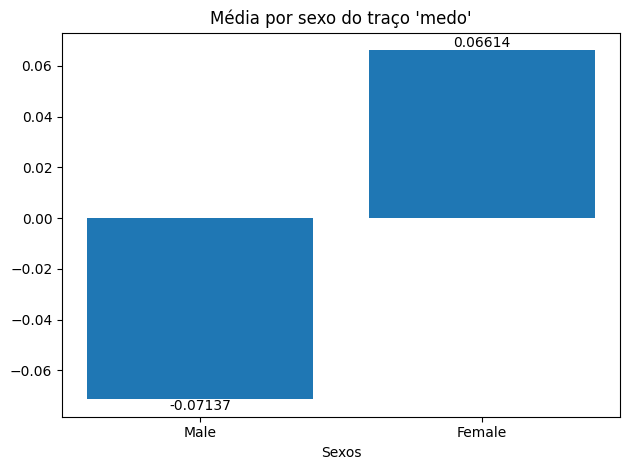

In [127]:
mean_values = df.groupby(['SEX'])['fearfulness'].mean().sort_values()
mean_values

fig, ax = plt.subplots()

#plot graph
b1 = ax.bar(height=mean_values, x=mean_values.index)

ax.bar_label(ax.containers[0],fmt="%.5f")

plt.title("Média por sexo do traço 'medroso'")
plt.xlabel('Sexos')

plt.tight_layout()

plt.show()

É possível reparar uma diferença entre os sexos feminino e masculino para o traço de personalidade 'medroso'. Inclusive o grupo masculino tendo  uma média negativa (indivíduos com menos medo) e o grupo feminino tendo uma média positiva (indivíduos com mais medo).

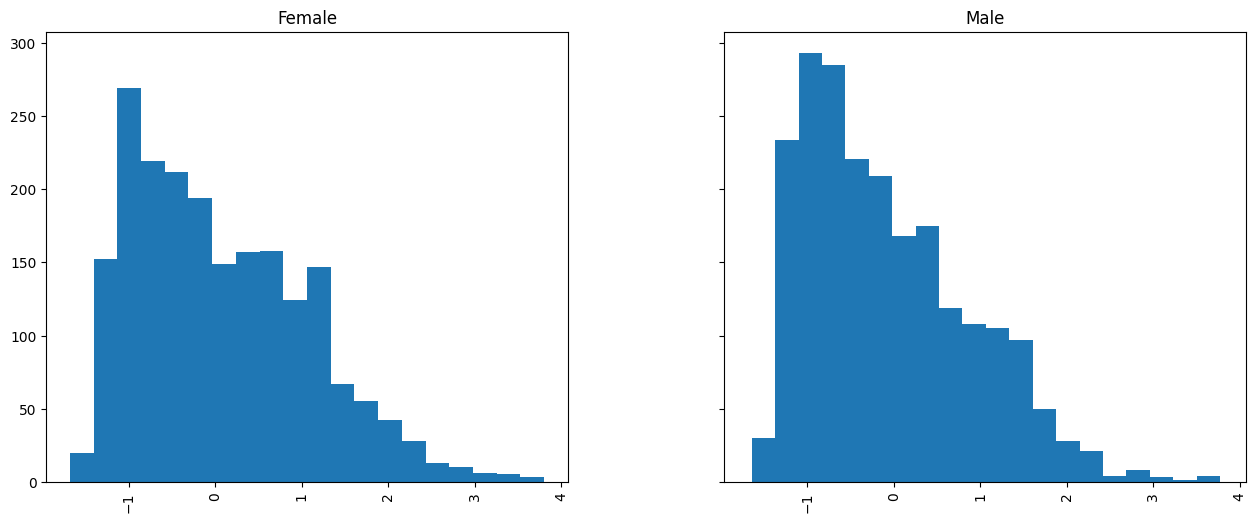

In [164]:
ax = df.hist(column = 'fearfulness',by='SEX', bins=20,figsize=(15,6), sharex=True, sharey=True) 


---

Vamos avaliar a correlação entre os escores. Para isso, selecionaremos apenas as variáveis numéricas do dataset. Em seguida, será construído um mapa de calor

In [14]:
df_float = df.loc[:,'fearfulness':]
df_float['AGE_BEHAVIOUR'] = df['AGE_BEHAVIOUR']

#Eliminando duplicatas para visualização numérica ordenada das correlações
df_float_corr = df_float.corr()
df_float_corr = df_float_corr.mask(np.tril(np.ones(df_float_corr.shape)).astype(bool))
s = df_float_corr.unstack().sort_values(kind="quicksort")
print(s.where(s < 1).dropna())

AGE_BEHAVIOUR         activity_playfulness   -0.434555
                      cat_sociability        -0.339084
cat_sociability       human_aggression       -0.291590
human_sociability     fearfulness            -0.238135
litterbox_issues      cat_sociability        -0.195823
excessive_grooming    cat_sociability        -0.154300
activity_playfulness  fearfulness            -0.154054
cat_sociability       fearfulness            -0.126815
human_sociability     human_aggression       -0.097501
litterbox_issues      activity_playfulness   -0.087579
excessive_grooming    activity_playfulness   -0.063753
activity_playfulness  human_aggression       -0.003534
litterbox_issues      human_sociability       0.043452
human_sociability     cat_sociability         0.044946
AGE_BEHAVIOUR         fearfulness             0.088335
                      human_sociability       0.091703
                      human_aggression        0.105011
excessive_grooming    human_sociability       0.105065
AGE_BEHAVI

<Axes: >

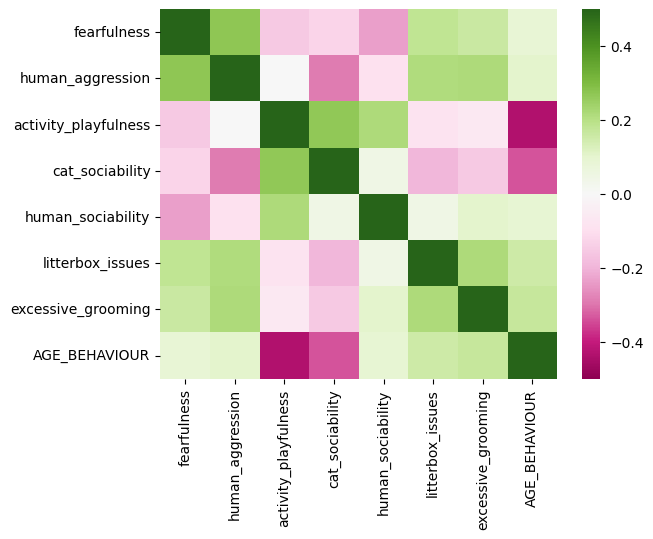

In [ ]:
#Visualização das correlações por mapa de calor
sns.heatmap(df_float.corr(),vmin=-0.5, vmax=0.5,cmap="PiYG")

Algumas observações interessantes sobre as correlações:
*   A idade do animal possui uma correlação negativa com seu nível de atividade.
e com a sociabilidade com outros animais.
*   A sociabilidade com humanos tem baixa correlação com a sociabilidade em relação a outros gatos.
* Alguns traços de personalidade relacionados ao estresse tem correlação positiva entre si, apesar de baixa. São eles: medo, agressão direciona à humanos, problemas com a caixa de areia e lambedura excessiva.
* A idade do animal praticamente não possui correlação com sua sociabilidade com humanos.


---








Vamos analisar agora o traço de personalidade "atividade/brincadeira". 



In [98]:
mean_values = df.groupby('BREEDGROUP')['activity_playfulness'].mean().sort_values()
mean_values.index

Index(['Persian_and_Exotic', 'Ragdoll', 'British', 'Sacred_Birman',
       'Landrace_Cat_Shorthair', 'House_cat', 'American_Curl', 'Maine_Coon',
       'Landrace_Cat_Longhair', 'Siberian_and_Neva_Masquerade',
       'Norwegian_Forest_Cat', 'Sphynx_and_Devon_Rex', 'European',
       'Siamese_and_Balinese', 'Russian_Blue', 'Cornish_Rex', 'Korat', 'Other',
       'Burmese', 'Turkish_Van', 'Oriental', 'Somali', 'Turkish_Angora',
       'Ocicat', 'Abyssinian', 'Bengal'],
      dtype='object', name='BREEDGROUP')

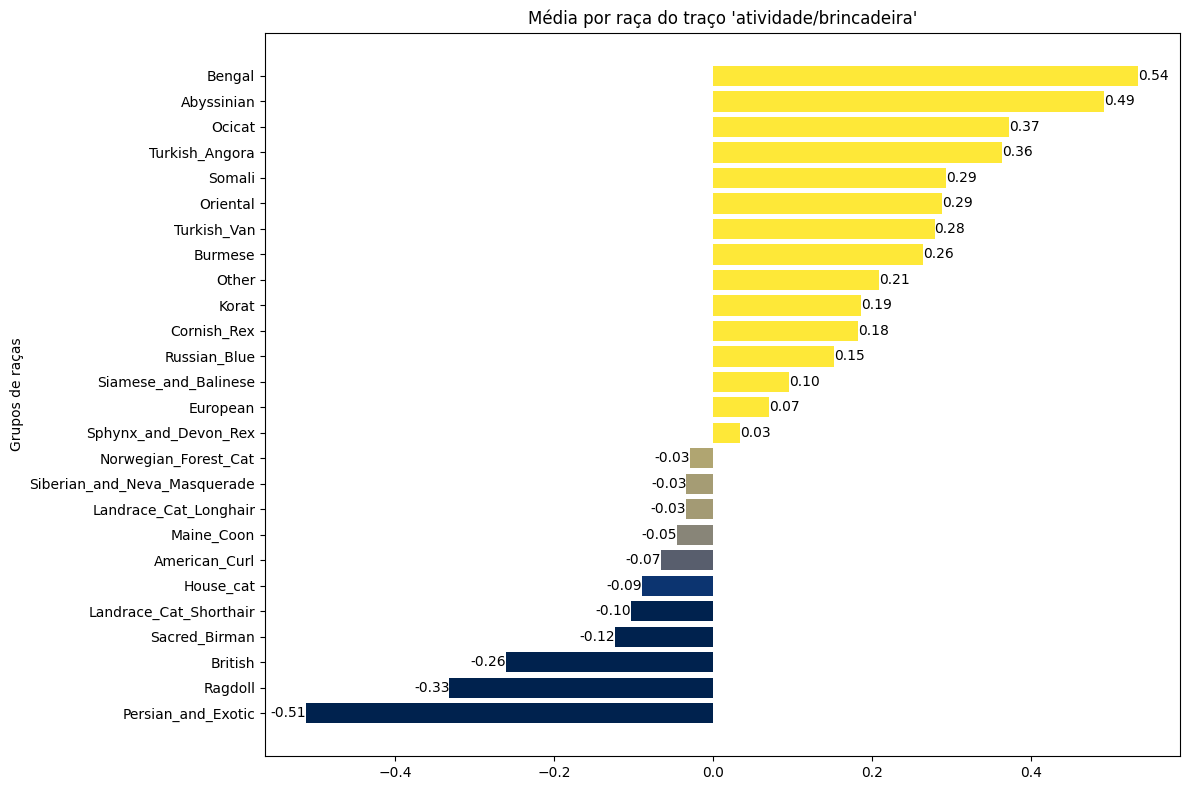

In [100]:
fig, ax = plt.subplots(figsize=(12,8))

#bar_colors
df_mean_values = mean_values.to_frame()
barcolors = []
for i in df_mean_values['activity_playfulness']:  
  barcolors.append(mpl.colors.to_hex(plt.cm.cividis(i*10+1)))

#plot graph
b1 = ax.barh(y=mean_values.index, width=mean_values,color=barcolors)

ax.bar_label(ax.containers[0],fmt="%.2f")

plt.title("Média por raça do traço 'atividade/brincadeira'")
plt.ylabel('Grupos de raças')

plt.tight_layout()

plt.show()

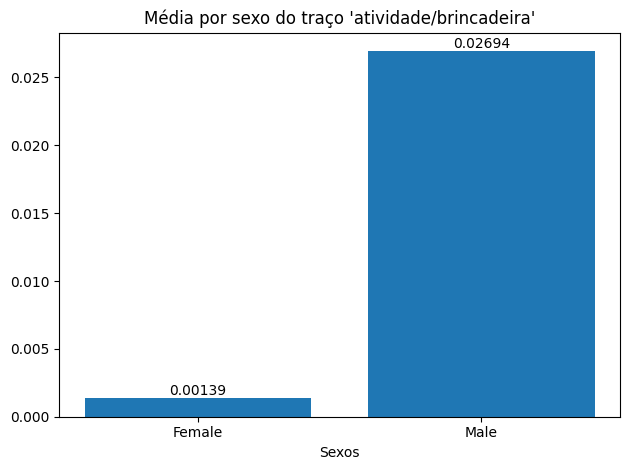

In [126]:
mean_values = df.groupby(['SEX'])['activity_playfulness'].mean().sort_values()
mean_values

fig, ax = plt.subplots()

#plot graph
b1 = ax.bar(height=mean_values, x=mean_values.index)

ax.bar_label(ax.containers[0],fmt="%.5f")

plt.title("Média por sexo do traço 'atividade/brincadeira'")
plt.xlabel('Sexos')

plt.tight_layout()

plt.show()

É possível observar uma diferença entre os sexos feminino e masculino para o traço 'atividade/brincadeira'. Entretanto, ambas as médias estão acima de zero.